In [1]:
import csv
import os
import random
import numpy as np

In [2]:
#train_commands = ["yes", "no", "up", "down", "left", "right", "on", "cat", "off", "tree", "house", "bird", "stop", "go", "visual", "backward", "follow", "forward", "learn", "sheila", "unknown"]
#test_commands = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "unknown"]
train_commands = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "cat", "tree", "house", "bird", "visual", "backward", "follow", "forward", "learn", "sheila", "unknown"]
test_commands = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go", "unknown"]
unk_commands = ["bed", "dog", "happy", "marvin", "wow"]

In [3]:
np.random.seed(1)
root = "speech_commands/unknown"
unk_train = []
unk_test = []
for unk_command in unk_commands:
    unk_command_filelist = os.listdir(os.path.join(root, unk_command))
    np.random.shuffle(unk_command_filelist)
    num_unk_command_files = len(unk_command_filelist)
    print(num_unk_command_files)
    num_unk_command_files_train = int(num_unk_command_files * 0.9)
    print(num_unk_command_files_train)
    unk_command_filelist_train = unk_command_filelist[:num_unk_command_files_train]
    unk_command_filelist_test = unk_command_filelist[num_unk_command_files_train:]
    unk_train.extend([(os.path.join(os.path.join("unknown", unk_command), unk_command_file), "unknown") for unk_command_file in unk_command_filelist_train])
    unk_test.extend([(os.path.join(os.path.join("unknown", unk_command), unk_command_file), "unknown") for unk_command_file in unk_command_filelist_test])

2014
1812
2128
1915
2054
1848
2100
1890
2123
1910


In [4]:
command_train = []
command_test = []
root = "speech_commands"
for train_command in train_commands:
    train_command_filelist = os.listdir(os.path.join(root, train_command))
    command_train.extend([(os.path.join(train_command, train_command_file), train_command) for train_command_file in train_command_filelist])

for test_command in test_commands:
    test_command_filelist = os.listdir(os.path.join(root, test_command))
    command_test.extend([(os.path.join(test_command, test_command_file), test_command) for test_command_file in test_command_filelist])
    


In [5]:
all_train_commands = command_train + unk_train
all_test_commands = command_test + unk_test

In [6]:
with open('train_commands.csv', 'w', newline='') as csvfile_train:
    writer = csv.writer(csvfile_train)
    writer.writerow(('filename', 'label'))
    for filename_label_tuple in all_train_commands:
        writer.writerow(filename_label_tuple)        

In [7]:
with open('test_commands.csv', 'w', newline='') as csvfile_test:
    writer = csv.writer(csvfile_test)
    writer.writerow(('filename', 'label'))
    for filename_label_tuple in all_test_commands:
        writer.writerow(filename_label_tuple) 

/home/robin/.conda/envs/py36cuda10torch/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


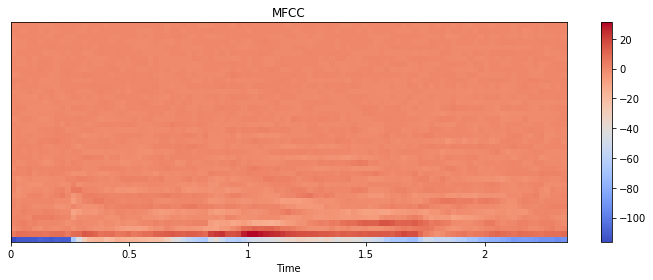

In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

path = "speech_commands/backward/0a2b400e_nohash_0.wav"
wave = librosa.load(path, sr=16000)[0]
spectrogram = librosa.feature.melspectrogram(wave, sr=16000, n_mels=40, hop_length=160, n_fft=480, fmin=20, fmax=4000)
idx = [spectrogram > 0]
spectrogram[idx] = np.log(spectrogram[idx])
mfcc = librosa.feature.mfcc(S=spectrogram, n_mfcc=40, dct_type=2).astype(np.float32)
plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [2]:
print(librosa.__version__)

0.7.0


In [3]:
librosa.display

AttributeError: module 'librosa' has no attribute 'display'

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

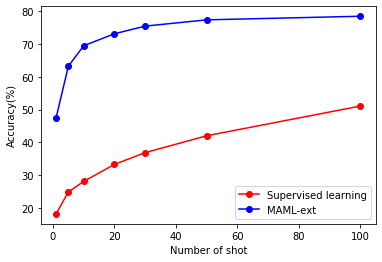

In [13]:
x = np.array([1,5,10,20,30,50,100])
y1 = np.array([18.14,24.83,28.07,33.24,36.85,41.99,51.07])
y2 = np.array([47.42,63.22,69.48,73.13,75.47,77.38,78.48])

fig, ax = plt.subplots()
ax.plot(x, y1, 'ro-', color='r', label='Supervised learning')
ax.plot(x, y2, 'ro-', color='b', label='MAML-ext')
legend = ax.legend(loc='lower right')
plt.xlabel("Number of shot")
plt.ylabel("Accuracy(%)")
#for i,j in zip(x, y1):
    #ax.annotate(str(j), xy=(i,j))
#for i,j in zip(x, y2):
    #ax.annotate(str(j), xy=(i,j))
plt.savefig('accuracy_digits.png')
plt.show()

In [1]:
import csv
import os
import random
import numpy as np

In [2]:
train_commands = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

In [3]:
command_train = []
command_test = []
root = "speech_commands"
for train_command in train_commands:
    train_command_filelist = os.listdir(os.path.join(root, train_command))
    np.random.shuffle(train_command_filelist)
    len_filelist = len(train_command_filelist)
    num_train_file = int(len_filelist * 0.9)
    command_train.extend([(os.path.join(train_command, train_command_file), train_command) for train_command_file in train_command_filelist[:num_train_file]])
    command_test.extend([(os.path.join(train_command, train_command_file), train_command) for train_command_file in train_command_filelist[num_train_file:]])

In [6]:
with open('train_upperbound.csv', 'w', newline='') as csvfile_train:
    writer = csv.writer(csvfile_train)
    writer.writerow(('filename', 'label'))
    for filename_label_tuple in command_train:
        writer.writerow(filename_label_tuple)        

In [7]:
with open('test_upperbound.csv', 'w', newline='') as csvfile_test:
    writer = csv.writer(csvfile_test)
    writer.writerow(('filename', 'label'))
    for filename_label_tuple in command_test:
        writer.writerow(filename_label_tuple) 

In [9]:
import csv
import os
import random
import numpy as np

In [10]:
train_commands = ["yes", "no", "up", "down", "left", "right", "on", "cat", "off", "tree", "house", "bird", "stop", "go", "visual", "backward", "follow", "forward", "learn", "sheila"]
test_commands = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]
val_commands = [["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]]
unk_commands = ["bed", "dog", "happy", "marvin", "wow"]

In [11]:
np.random.seed(1)
root = "speech_commands/unknown"
unk_train = []
unk_val = []
unk_test = []
for unk_command in unk_commands:
    unk_command_filelist = os.listdir(os.path.join(root, unk_command))
    np.random.shuffle(unk_command_filelist)
    num_unk_command_files = len(unk_command_filelist)
    print(num_unk_command_files)
    num_unk_command_files_train = int(num_unk_command_files * 0.4)
    print(num_unk_command_files_train)
    num_unk_command_files_val = int(num_unk_command_files * 0.3)
    print(num_unk_command_files_val)
    
    unk_command_filelist_train = unk_command_filelist[:num_unk_command_files_train]
    unk_command_filelist_val = unk_command_filelist[num_unk_command_files_train:(num_unk_command_files_train+num_unk_command_files_val)]
    unk_command_filelist_test = unk_command_filelist[(num_unk_command_files_train+num_unk_command_files_val):]
    
    unk_train.extend([(os.path.join(os.path.join("unknown", unk_command), unk_command_file), "unknown") for unk_command_file in unk_command_filelist_train])
    unk_val.extend([(os.path.join(os.path.join("unknown", unk_command), unk_command_file), "unknown_val") for unk_command_file in unk_command_filelist_val])
    unk_test.extend([(os.path.join(os.path.join("unknown", unk_command), unk_command_file), "unknown_test") for unk_command_file in unk_command_filelist_test])

2014
805
604
2128
851
638
2054
821
616
2100
840
630
2123
849
636


In [12]:
command_train = []
command_val = []
command_test = []
root = "speech_commands"

for train_command in train_commands:
    train_command_filelist = os.listdir(os.path.join(root, train_command))
    command_train.extend([(os.path.join(train_command, train_command_file), train_command) for train_command_file in train_command_filelist])

for command in test_commands:
    command_filelist = os.listdir(os.path.join(root, command))
    np.random.shuffle(command_filelist)
    num_command_files = len(command_filelist)
    num_command_files_val = int(num_command_files * 0.5)
    
    val_command_filelist = command_filelist[:num_command_files_val]
    test_command_filelist = command_filelist[num_command_files_val:]
    
    command_val.extend([(os.path.join(command, val_command_file), command+'_val') for val_command_file in val_command_filelist])
    command_test.extend([(os.path.join(command, test_command_file), command+'_test') for test_command_file in test_command_filelist])

In [13]:
all_train_commands = command_train + unk_train
all_val_commands = command_val + unk_val
all_test_commands = command_test + unk_test

In [14]:
with open('2020_train_commands.csv', 'w', newline='') as csvfile_train:
    writer = csv.writer(csvfile_train)
    for filename_label_tuple in command_train:
        writer.writerow(filename_label_tuple)        
        
with open('2020_unk_train.csv', 'w', newline='') as csvfile_train:
    writer = csv.writer(csvfile_train)
    for filename_label_tuple in unk_train:
        writer.writerow(filename_label_tuple)  

In [15]:
with open('2020_val_commands.csv', 'w', newline='') as csvfile_val:
    writer = csv.writer(csvfile_val)
    for filename_label_tuple in command_val:
        writer.writerow(filename_label_tuple) 

with open('2020_unk_val.csv', 'w', newline='') as csvfile_val:
    writer = csv.writer(csvfile_val)
    for filename_label_tuple in unk_val:
        writer.writerow(filename_label_tuple) 

In [16]:
with open('2020_test_commands.csv', 'w', newline='') as csvfile_test:
    writer = csv.writer(csvfile_test)
    for filename_label_tuple in command_test:
        writer.writerow(filename_label_tuple) 
        
with open('2020_unk_test.csv', 'w', newline='') as csvfile_test:
    writer = csv.writer(csvfile_test)
    for filename_label_tuple in unk_test:
        writer.writerow(filename_label_tuple) 

In [18]:
with open('2020_silence_train.csv', 'w', newline='') as csvfile_train:
    writer = csv.writer(csvfile_train)
    i = 0
    while(i < 4166):
        writer.writerow(('silence/random_generated_silence.wav', 'silence'))
        i += 1

with open('2020_silence_val.csv', 'w', newline='') as csvfile_train:
    writer = csv.writer(csvfile_train)
    i = 0
    while(i < 3124):
        writer.writerow(('silence/random_generated_silence.wav', 'silence_val'))
        i += 1

with open('2020_silence_test.csv', 'w', newline='') as csvfile_train:
    writer = csv.writer(csvfile_train)
    i = 0
    while(i < 3129):
        writer.writerow(('silence/random_generated_silence.wav', 'silence_test'))
        i += 1